In [ ]:
!pip install --upgrade pip
!pip install ipython-sql
!pip install sqlalchemy
!pip install pandas
!pip install trino
!pip install seaborn
!pip install bokeh
!pip install numpy
!pip install matplotlib
!pip install plotly
!pip install ggplot
!pip install altair
!pip install ipywidgets


In [ ]:
import os

host = os.getenv('sephostaws1')
port = os.getenv('sepport')
user = os.getenv('sepuser')
password = os.getenv('seppassword')
catalog = os.getenv('sepcatalog')

print(host, port, user, catalog)

In [ ]:
import os

host = os.getenv('gmhost')
user = os.getenv('gmuser')
port = os.getenv('sepport')
password = os.getenv('gmpassword')
catalog = os.getenv('gmcatalog')

print(host, port, user, catalog)

In [ ]:
#Example of using sqlalchemy

from sqlalchemy import create_engine
from sqlalchemy.schema import Table, MetaData
from sqlalchemy.sql.expression import select, text

mycon1 = ["trino://",user,":",password,"@",host,":",port,"/system"]
mycon2=''.join(mycon1)

engine = create_engine(mycon2)
connection = engine.connect()
rows = connection.execute(text("SELECT * FROM runtime.nodes")).fetchall()

for row in rows:
    print(row)

In [23]:
import trino, time
import datetime
import csv

start = time.time()
now = datetime.datetime.now()
print (now)
conn = trino.dbapi.connect(
    host,
    port,
    http_scheme='https',
    auth=trino.auth.BasicAuthentication(user, password),
)
cur = conn.cursor()
cur.execute('SELECT count(*) FROM tpch.tiny.orders')
rows = cur.fetchall()
for row in rows:
    print(row)

2024-01-16 12:58:48.551646
[15000]


In [24]:
import trino, time, datetime, csv

start = time.time()
now = datetime.datetime.now()
print (now)
conn = trino.dbapi.connect(
    host,
    port,
    http_scheme='https',
    auth=trino.auth.BasicAuthentication(user, password),
)
cur = conn.cursor()
cur.execute('SELECT * FROM tpch.tiny.nation')
rows = cur.fetchall()
for row in rows:
    print(row)
# Create the csv file - writes to the default local folder
with open('sql.csv', 'w', newline='') as f_handle:
    writer = csv.writer(f_handle)
    # Iterate over `data`  and  write to the csv file
    for row in rows:
        writer.writerow(row)

end = time.time()
print(end - start)
now = datetime.datetime.now()
print (now)

2024-01-16 12:58:49.166245
[0, 'ALGERIA', 0, ' haggle. carefully final deposits detect slyly agai']
[1, 'ARGENTINA', 1, 'al foxes promise slyly according to the regular accounts. bold requests alon']
[2, 'BRAZIL', 1, 'y alongside of the pending deposits. carefully special packages are about the ironic forges. slyly special ']
[3, 'CANADA', 1, 'eas hang ironic, silent packages. slyly regular packages are furiously over the tithes. fluffily bold']
[4, 'EGYPT', 4, 'y above the carefully unusual theodolites. final dugouts are quickly across the furiously regular d']
[5, 'ETHIOPIA', 0, 'ven packages wake quickly. regu']
[6, 'FRANCE', 3, 'refully final requests. regular, ironi']
[7, 'GERMANY', 3, 'l platelets. regular accounts x-ray: unusual, regular acco']
[8, 'INDIA', 2, 'ss excuses cajole slyly across the packages. deposits print aroun']
[9, 'INDONESIA', 2, ' slyly express asymptotes. regular deposits haggle slyly. carefully ironic hockey players sleep blithely. carefull']
[10, 'IRAN', 4,

In [25]:
import trino
conn = trino.dbapi.connect(
    host,
    port,
    http_scheme='https',
    auth=trino.auth.BasicAuthentication(user, password),
)
cur = conn.cursor()
cur.execute("SELECT * from tpch.tiny.nation""")
rows = cur.fetchall()
for row in rows:
    print(row)

[0, 'ALGERIA', 0, ' haggle. carefully final deposits detect slyly agai']
[1, 'ARGENTINA', 1, 'al foxes promise slyly according to the regular accounts. bold requests alon']
[2, 'BRAZIL', 1, 'y alongside of the pending deposits. carefully special packages are about the ironic forges. slyly special ']
[3, 'CANADA', 1, 'eas hang ironic, silent packages. slyly regular packages are furiously over the tithes. fluffily bold']
[4, 'EGYPT', 4, 'y above the carefully unusual theodolites. final dugouts are quickly across the furiously regular d']
[5, 'ETHIOPIA', 0, 'ven packages wake quickly. regu']
[6, 'FRANCE', 3, 'refully final requests. regular, ironi']
[7, 'GERMANY', 3, 'l platelets. regular accounts x-ray: unusual, regular acco']
[8, 'INDIA', 2, 'ss excuses cajole slyly across the packages. deposits print aroun']
[9, 'INDONESIA', 2, ' slyly express asymptotes. regular deposits haggle slyly. carefully ironic hockey players sleep blithely. carefull']
[10, 'IRAN', 4, 'efully alongside of the s

In [26]:
cur = conn.cursor()

cur.execute("show catalogs")

rows = cur.fetchall()

rows

[['cdp'],
 ['data_products'],
 ['hive'],
 ['hive2'],
 ['iceberg'],
 ['jmx'],
 ['postgres'],
 ['postgres_hive'],
 ['system'],
 ['tpcds'],
 ['tpch']]

In [27]:
cur.execute("""
select
    o.orderkey as "Order #",
    c.name as "Name",
    c.phone as "Phone",
    o.orderpriority as "Priority"
from
    tpch.sf1.orders o
    join tpch.sf1.customer c on o.custkey = c.custkey
where
    o.orderstatus = 'O'
    and o.orderpriority = '2-HIGH'
""")

#rows = cur.fetchall()
rows = cur.fetchall()[:10]
print(rows)

[[7, 'Customer#000039136', '15-400-347-1643', '2-HIGH'], [32, 'Customer#000130057', '19-938-862-4157', '2-HIGH'], [102, 'Customer#000000716', '22-501-849-6084', '2-HIGH'], [166, 'Customer#000107812', '29-235-710-7964', '2-HIGH'], [199, 'Customer#000052970', '33-361-100-6033', '2-HIGH'], [320, 'Customer#000000302', '14-152-594-2967', '2-HIGH'], [326, 'Customer#000075986', '31-447-476-6129', '2-HIGH'], [354, 'Customer#000138268', '19-644-102-2178', '2-HIGH'], [357, 'Customer#000060395', '19-225-825-5121', '2-HIGH'], [449, 'Customer#000095767', '17-525-866-7503', '2-HIGH']]


In [28]:
from trino.dbapi import connect
import pandas as pd
df = pd.DataFrame(rows)

df

,0,1,2,3
0,7,Customer#000039136,15-400-347-1643,2-HIGH
1,32,Customer#000130057,19-938-862-4157,2-HIGH
2,102,Customer#000000716,22-501-849-6084,2-HIGH
3,166,Customer#000107812,29-235-710-7964,2-HIGH
4,199,Customer#000052970,33-361-100-6033,2-HIGH
5,320,Customer#000000302,14-152-594-2967,2-HIGH
6,326,Customer#000075986,31-447-476-6129,2-HIGH
7,354,Customer#000138268,19-644-102-2178,2-HIGH
8,357,Customer#000060395,19-225-825-5121,2-HIGH
9,449,Customer#000095767,17-525-866-7503,2-HIGH


In [29]:
cur.execute("""
SELECT
  count(*)
FROM
    tpch.tiny.lineitem l
    INNER JOIN tpch.tiny.orders o ON (l.orderkey = o.orderkey)
""")
rows = cur.fetchall()
df = pd.DataFrame(rows)
df

,0
0,60175


In [30]:
import pandas as pd

param='AUTOMOBILE'
query=f"""SELECT * FROM "tpch"."tiny"."customer" where "acctbal" != 0 and "mktsegment"='{param}' """

df = pd.read_sql(query, conn)
df.acctbal.agg(['sum', 'min', 'max', 'mean'])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


sum     1.395696e+06
min    -9.329600e+02
max     9.983380e+03
mean    4.621509e+03
Name: acctbal, dtype: float64

In [31]:
import pandas as pd
#df=pd.read_sql('SELECT * FROM "tpch"."tiny"."customer" where "acctbal" != 0 and "mktsegment" IS NOT NULL', conn)

query=f"""SELECT * FROM "tpch"."tiny"."lineitem" """

df = pd.read_sql(query, conn)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


<AxesSubplot: ylabel='Frequency'>

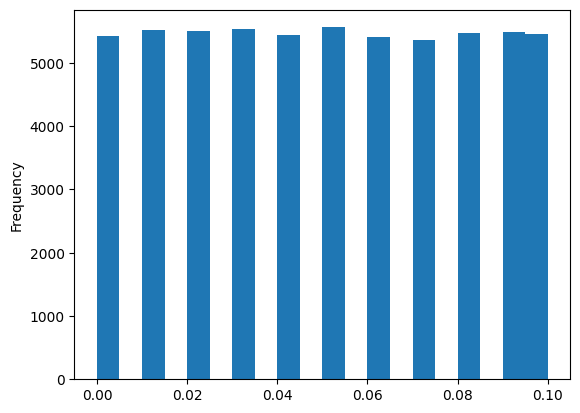

In [32]:
#df.quantity.plot(kind='hist', bins=20)
#df.extendedprice.plot(kind='hist')
df.discount.plot(kind='hist', bins=20)

In [33]:
import seaborn as sns 
import matplotlib.pyplot as plt 

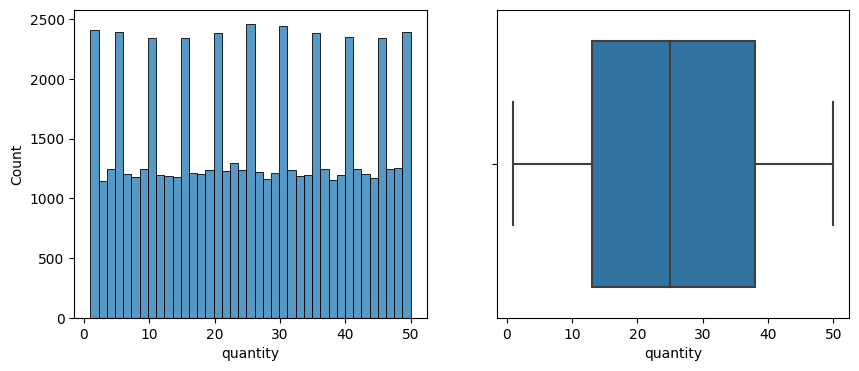

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.histplot(data=df, x='quantity', ax=ax[0])
sns.boxplot(data=df, x='quantity', ax=ax[1]);

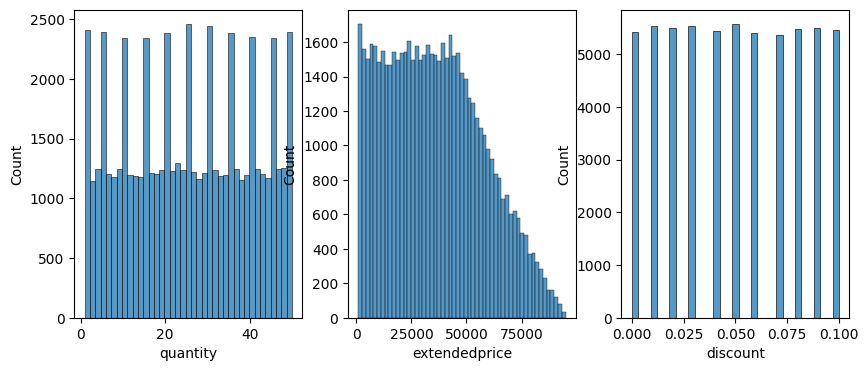

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,4))
sns.histplot(data=df, x='quantity', ax=ax[0])
sns.histplot(data=df, x='extendedprice', ax=ax[1])
sns.histplot(data=df, x='discount', ax=ax[2]);

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='quantity', ylabel='extendedprice'>

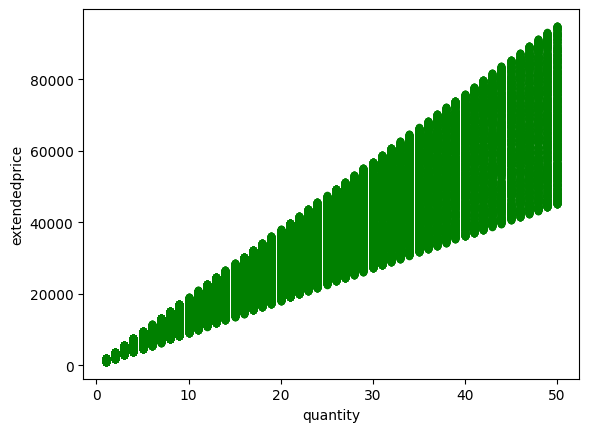

In [36]:

df.plot(x='quantity', y='extendedprice', kind = 'scatter', color='green')

#a, b = np.polyfit(df.quantity, df.extendedprice, 1)
#plt.show()


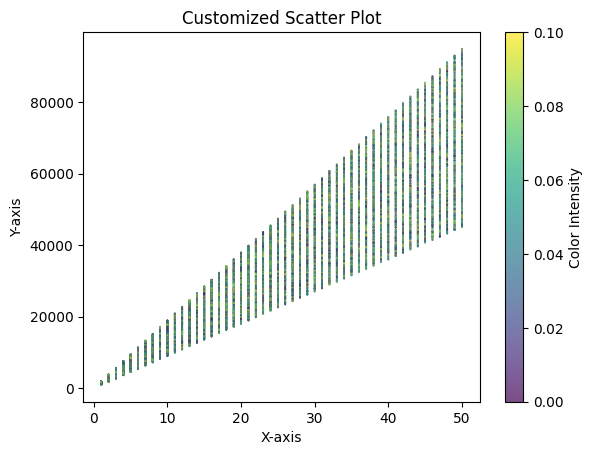

In [37]:


import matplotlib.pyplot as plt
import numpy as np
 
# Generate random data
x = df.quantity
y = df.extendedprice
colors = df.discount
sizes = df.tax
 
# Create a customized scatter plot
plt.scatter(x, y, c=colors, s=sizes, alpha=0.7, cmap='viridis')
 
# Add title and axis labels
plt.title("Customized Scatter Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
 
# Display color intensity scale
plt.colorbar(label='Color Intensity')
 
# Show the plot
plt.show()

               orderkey   partkey   suppkey  linenumber  quantity  \
orderkey       1.000000 -0.003878 -0.004185    0.000057  0.002637   
partkey       -0.003878  1.000000  0.006289    0.001623  0.001548   
suppkey       -0.004185  0.006289  1.000000    0.003033  0.002072   
linenumber     0.000057  0.001623  0.003033    1.000000 -0.012246   
quantity       0.002637  0.001548  0.002072   -0.012246  1.000000   
extendedprice  0.002862  0.166224  0.007929   -0.008508  0.922912   
discount       0.000818  0.002203 -0.000006    0.000524 -0.010694   
tax           -0.000533 -0.006579 -0.000915    0.002251  0.003069   

               extendedprice  discount       tax  
orderkey            0.002862  0.000818 -0.000533  
partkey             0.166224  0.002203 -0.006579  
suppkey             0.007929 -0.000006 -0.000915  
linenumber         -0.008508  0.000524  0.002251  
quantity            0.922912 -0.010694  0.003069  
extendedprice       1.000000 -0.009725 -0.000296  
discount           -0

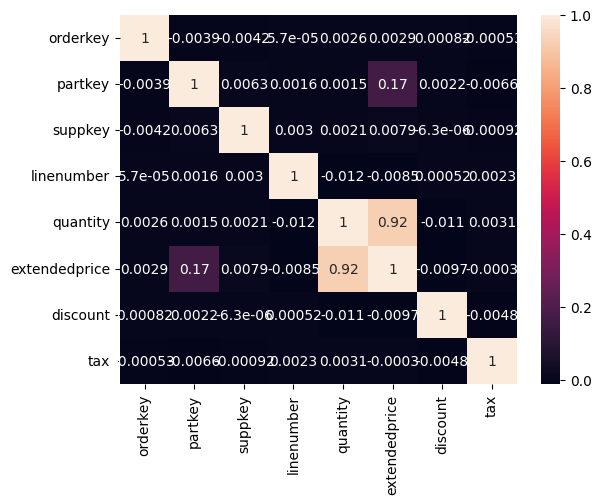

In [38]:
import seaborn as sn
import matplotlib.pyplot as plt

corr_matrix = df.corr()
print(corr_matrix)

sn.heatmap(corr_matrix, annot=True)
plt.show()